In [ ]:
# This part explores the effect of picture orientation on model performance

In [1]:
!pip install timm
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.8 MB/s eta 0:00:00


In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
# Connect to the google conlab
drive.mount('/content/drive')
# Set the dataset path
data_dir = "/content/drive/My Drive/MSc Project/5_Type_Knots_Horizontal"


# Create a label for the original data set and crop it to size 512x512
def create_csv_and_resize_images(data_dir, new_data_dir, csv_file):
    # Create a dictionary to map the knot type to the corresponding integer label
    label_dict = {'Bowline': 0, 'Clove_Hitch': 1, 'Figure_8_Knot': 2, 'Overhand': 3, 'Reef': 4}

    data = []
    if not os.path.exists(new_data_dir):
        os.makedirs(new_data_dir)
    for knot_type in os.listdir(data_dir):
        for light_condition in os.listdir(os.path.join(data_dir, knot_type)):
            for tension_condition in os.listdir(os.path.join(data_dir, knot_type, light_condition)):
                for image_file in os.listdir(os.path.join(data_dir, knot_type, light_condition, tension_condition)):
                    image_path = os.path.join(data_dir, knot_type, light_condition, tension_condition, image_file)
                    image = Image.open(image_path)
                    image = image.resize((512, 512))  # Adjust the image size
                    new_image_dir = os.path.join(new_data_dir, knot_type, light_condition, tension_condition)
                    if not os.path.exists(new_image_dir):
                        os.makedirs(new_image_dir)
                    new_image_path = os.path.join(new_image_dir, image_file)
                    image.save(new_image_path)
                    data.append([image_file, label_dict[knot_type]])  # Use a dictionary to get the corresponding integer label
    df = pd.DataFrame(data, columns=['image_path', 'label'])
    df.to_csv(csv_file, index=False)

new_data_dir = "/content/drive/My Drive/MSc Project/rawdata_Horizontal"  # The new dataset directory
csv_file = "/content/drive/My Drive/MSc Project/rawdata_Horizontal.csv"  # The CSV file directory
create_csv_and_resize_images(data_dir, new_data_dir, csv_file)


Mounted at /content/drive


In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
# Connect to the google conlab
drive.mount('/content/drive')
# Set the dataset path
data_dir = "/content/drive/My Drive/MSc Project/5_Type_Knots_Vertical"


# Create a label for the original data set and crop it to size 512x512
def create_csv_and_resize_images(data_dir, new_data_dir, csv_file):
    # Create a dictionary to map the knot type to the corresponding integer label
    label_dict = {'Bowline': 0, 'Clove_Hitch': 1, 'Figure_8_Knot': 2, 'Overhand': 3, 'Reef': 4}

    data = []
    if not os.path.exists(new_data_dir):
        os.makedirs(new_data_dir)
    for knot_type in os.listdir(data_dir):
        for light_condition in os.listdir(os.path.join(data_dir, knot_type)):
            for tension_condition in os.listdir(os.path.join(data_dir, knot_type, light_condition)):
                for image_file in os.listdir(os.path.join(data_dir, knot_type, light_condition, tension_condition)):
                    image_path = os.path.join(data_dir, knot_type, light_condition, tension_condition, image_file)
                    image = Image.open(image_path)
                    image = image.resize((512, 512))  # Adjust the image size
                    new_image_dir = os.path.join(new_data_dir, knot_type, light_condition, tension_condition)
                    if not os.path.exists(new_image_dir):
                        os.makedirs(new_image_dir)
                    new_image_path = os.path.join(new_image_dir, image_file)
                    image.save(new_image_path)
                    data.append([image_file, label_dict[knot_type]])  # Use a dictionary to get the corresponding integer label
    df = pd.DataFrame(data, columns=['image_path', 'label'])
    df.to_csv(csv_file, index=False)

new_data_dir = "/content/drive/My Drive/MSc Project/rawdata_Vertical"  # The new dataset directory
csv_file = "/content/drive/My Drive/MSc Project/rawdata_Vertical.csv"  # The CSV file directory
create_csv_and_resize_images(data_dir, new_data_dir, csv_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Use horizontal data to train ResNet18, ViT and EfficientNet

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 163MB/s] 


Epoch 0/24
----------
train Loss: 1.76310  Acc: 0.19012   F1_Score: 0.17105
val Loss: 1.76268  Acc: 0.24444   F1_Score: 0.19973

Epoch 1/24
----------
train Loss: 1.65671  Acc: 0.20741   F1_Score: 0.18758
val Loss: 1.64582  Acc: 0.25185   F1_Score: 0.18706

Epoch 2/24
----------
train Loss: 1.55650  Acc: 0.27901   F1_Score: 0.24576
val Loss: 1.54839  Acc: 0.29630   F1_Score: 0.23616

Epoch 3/24
----------
train Loss: 1.45604  Acc: 0.36790   F1_Score: 0.33429
val Loss: 1.43671  Acc: 0.36296   F1_Score: 0.35965

Epoch 4/24
----------
train Loss: 1.31677  Acc: 0.50617   F1_Score: 0.50575
val Loss: 1.33732  Acc: 0.53333   F1_Score: 0.53742

Epoch 5/24
----------
train Loss: 1.17652  Acc: 0.65185   F1_Score: 0.64907
val Loss: 1.23176  Acc: 0.61481   F1_Score: 0.62262

Epoch 6/24
----------
train Loss: 1.05977  Acc: 0.75556   F1_Score: 0.75942
val Loss: 1.13854  Acc: 0.68889   F1_Score: 0.68803

Epoch 7/24
----------
train Loss: 0.98663  Acc: 0.76049   F1_Score: 0.76523
val Loss: 1.06691  Ac

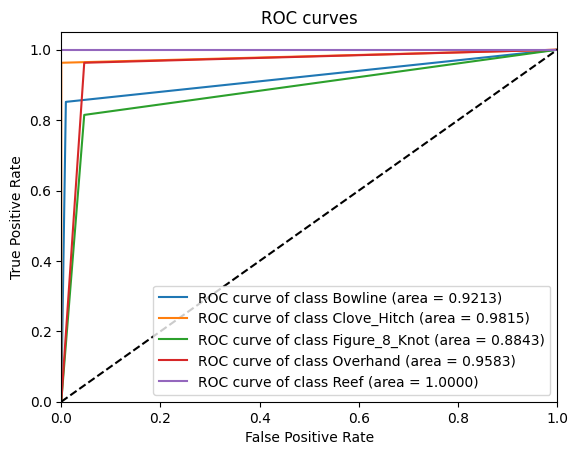

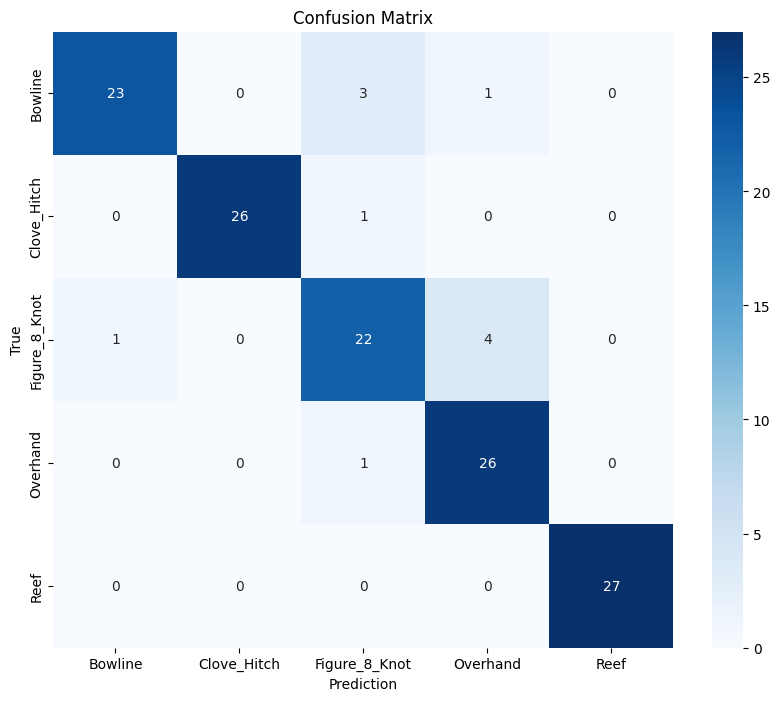

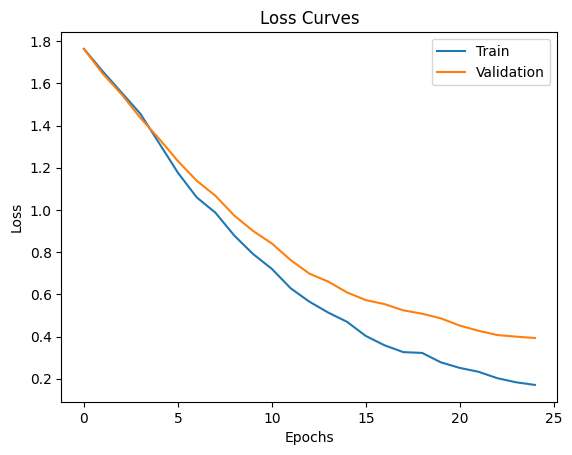

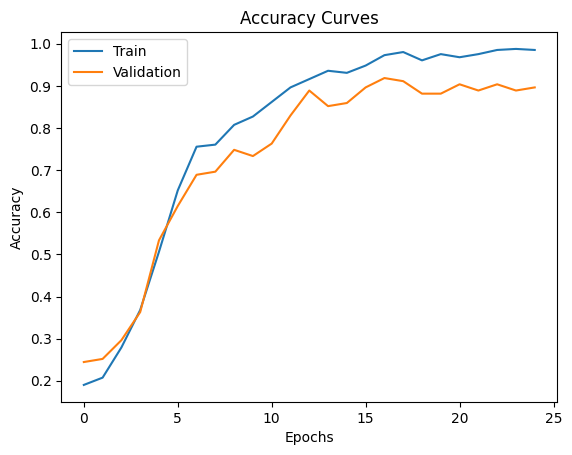

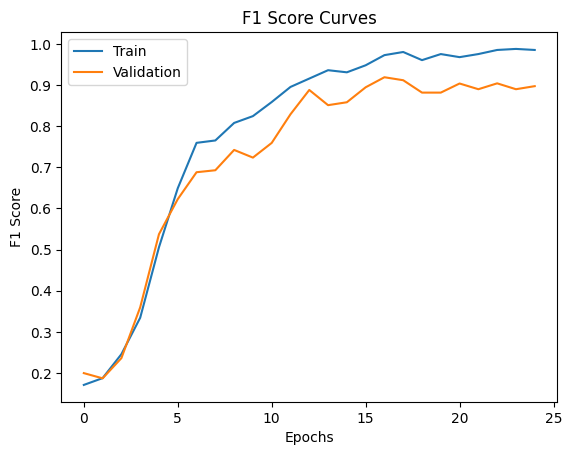

In [2]:
# ResNet18



import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
import optuna
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Horizontal", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []


def train_model(model, criterion, optimizer, num_epochs=25, accumulation_steps=4):   # Gradient Accumulation to slove the insufficient GPU memory
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        if (i+1) % accumulation_steps == 0:  # Only update every 'accumulation_steps' steps
                          optimizer.step()
                          optimizer.zero_grad()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels


# Load a pretrained model(ResNet18)
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # Change the fc layer to 5
model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train and evaluate
model, best_preds, best_labels = train_model(model, criterion, optimizer, num_epochs=25)






# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1
Epoch 0/24
----------
train Loss: 2.85859  Acc: 0.20247   F1_Score: 0.19913
val Loss: 3.29021  Acc: 0.28148   F1_Score: 0.19087

Epoch 1/24
----------
train Loss: 2.53658  Acc: 0.31111   F1_Score: 0.29352
val Loss: 1.30176  Acc: 0.55556   F1_Score: 0.46673

Epoch 2/24
----------
train Loss: 1.30220  Acc: 0.59506   F1_Score: 0.53474
val Loss: 0.68541  Acc: 0.79259   F1_Score: 0.79263

Epoch 3/24
----------
train Loss: 0.67764  Acc: 0.78765   F1_Score: 0.78381
val Loss: 0.95258  Acc: 0.71111   F1_Score: 0.70959

Epoch 4/24
----------
train Loss: 0.51938  Acc: 0.80988   F1_Score: 0.81153
val Loss: 0.56110  Acc: 0.78519   F1_Score: 0.79027

Epoch 5/24
----------
train Loss: 0.24354  Acc: 0.89630   F1_Score: 0.89851
val Loss: 0.17253  Acc: 0.95556   F1_Score: 0.95504

Epoch 6/24
----------
train Loss: 0.13589  Acc: 0.95309   F1_Score: 0.95229
val Loss: 0.24911  Acc: 0.92593   F1_Score: 0.92250

Epoch 7/24
----------
train Loss: 0.11356  Acc: 0.97037   F1_

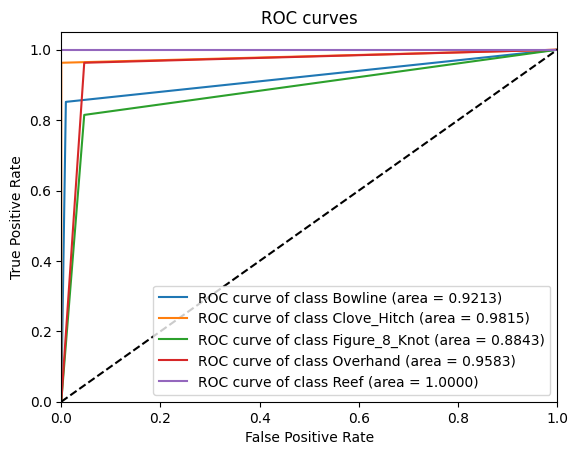

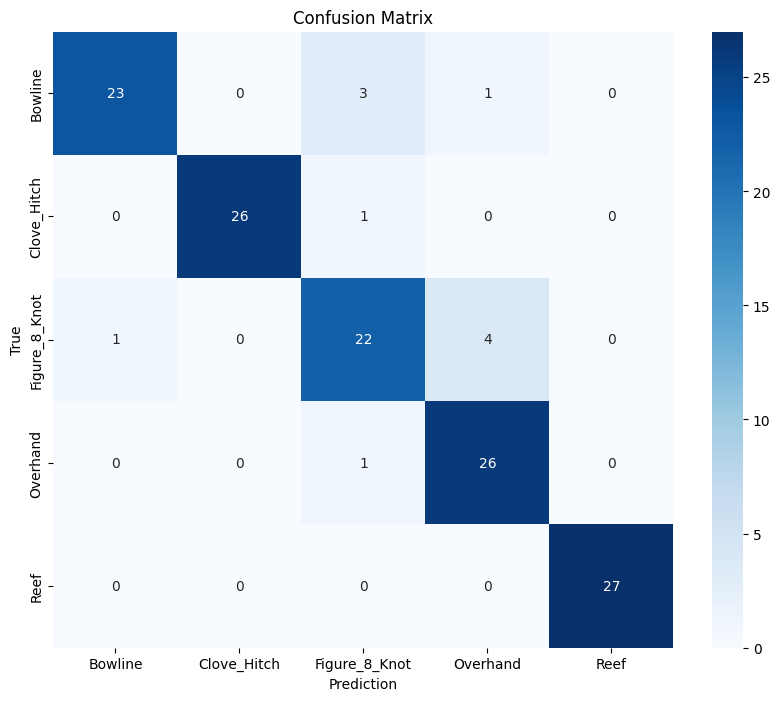

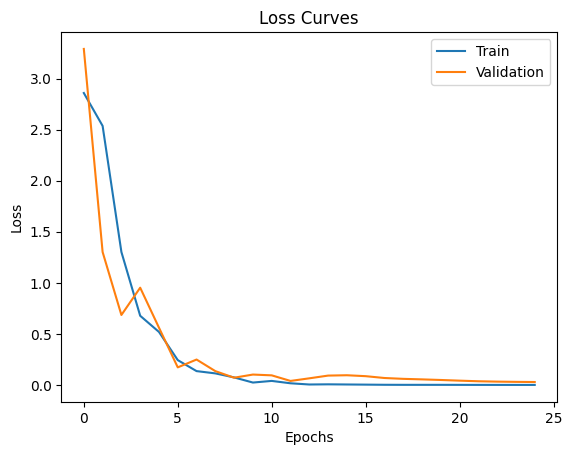

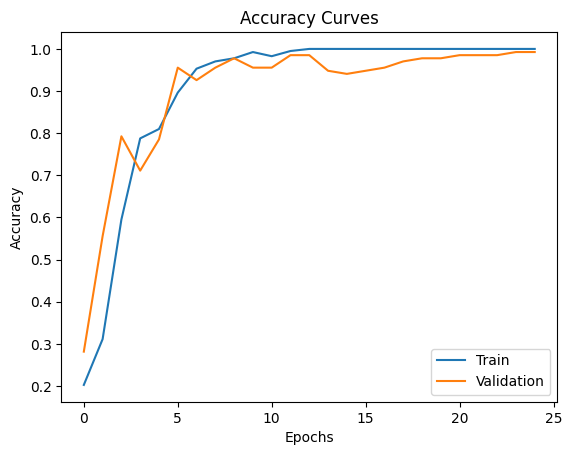

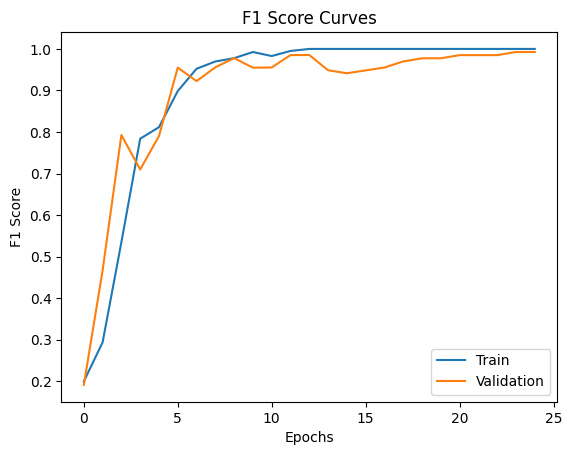

In [8]:
# Vision Transformers

import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
import optuna
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Horizontal", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []


def train_model(model, criterion, optimizer, num_epochs=25, accumulation_steps=4):   # Gradient Accumulation to slove the insufficient GPU memory
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        if (i+1) % accumulation_steps == 0:  # Only update every 'accumulation_steps' steps
                          optimizer.step()
                          optimizer.zero_grad()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels

# Load a pretrained model(ViT)
model = timm.create_model('vit_large_patch16_224', pretrained=True)
num_ftrs = model.head.in_features
model.head = nn.Linear(num_ftrs, 5)  # Change the head layer to 5
model = model.to(device)


criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train and evaluate
model = train_model(model, criterion, optimizer, num_epochs=25)







# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1


/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name tf_efficientnet_b5_ns to current tf_efficientnet_b5.ns_jft_in1k.
  model = create_fn(


Epoch 0/24
----------
train Loss: 1.61159  Acc: 0.21975   F1_Score: 0.20973
val Loss: 1.61156  Acc: 0.22222   F1_Score: 0.18799

Epoch 1/24
----------
train Loss: 1.54416  Acc: 0.39753   F1_Score: 0.40428
val Loss: 1.57925  Acc: 0.30370   F1_Score: 0.28965

Epoch 2/24
----------
train Loss: 1.46457  Acc: 0.57284   F1_Score: 0.56697
val Loss: 1.51540  Acc: 0.54815   F1_Score: 0.54099

Epoch 3/24
----------
train Loss: 1.37981  Acc: 0.70864   F1_Score: 0.70378
val Loss: 1.45163  Acc: 0.57778   F1_Score: 0.55865

Epoch 4/24
----------
train Loss: 1.28923  Acc: 0.80494   F1_Score: 0.80441
val Loss: 1.37882  Acc: 0.69630   F1_Score: 0.69136

Epoch 5/24
----------
train Loss: 1.20606  Acc: 0.84444   F1_Score: 0.84212
val Loss: 1.30188  Acc: 0.72593   F1_Score: 0.72149

Epoch 6/24
----------
train Loss: 1.09821  Acc: 0.86914   F1_Score: 0.86740
val Loss: 1.22895  Acc: 0.74815   F1_Score: 0.74406

Epoch 7/24
----------
train Loss: 0.98060  Acc: 0.91358   F1_Score: 0.91361
val Loss: 1.13775  Ac

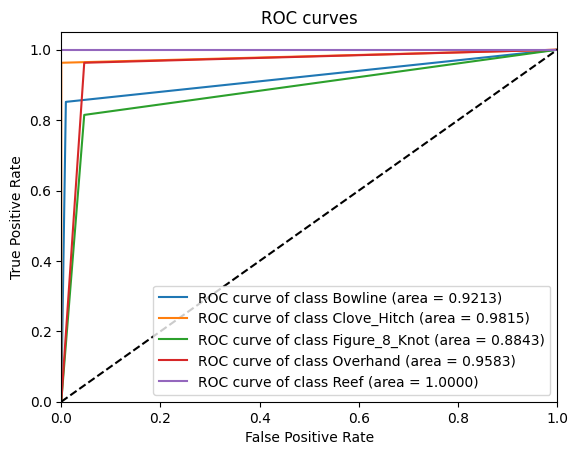

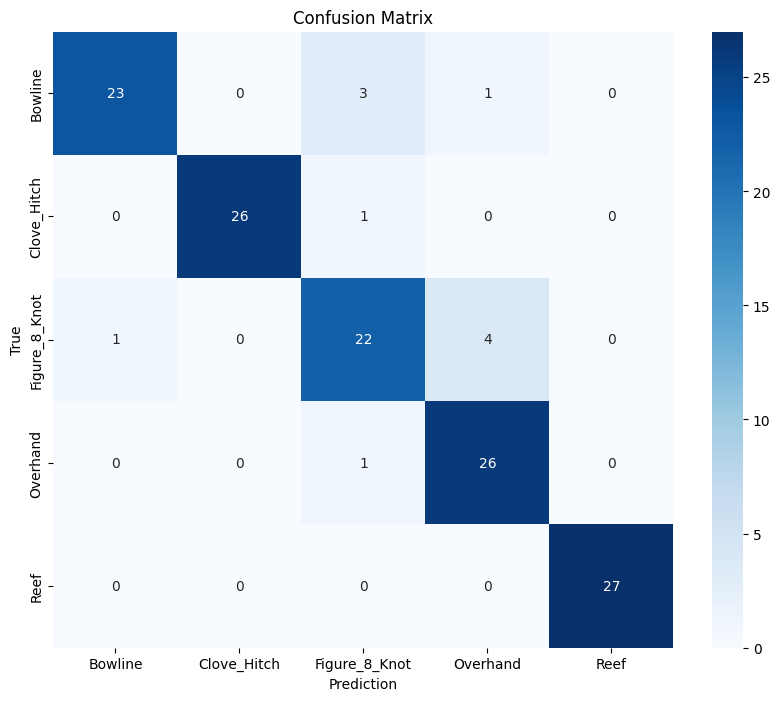

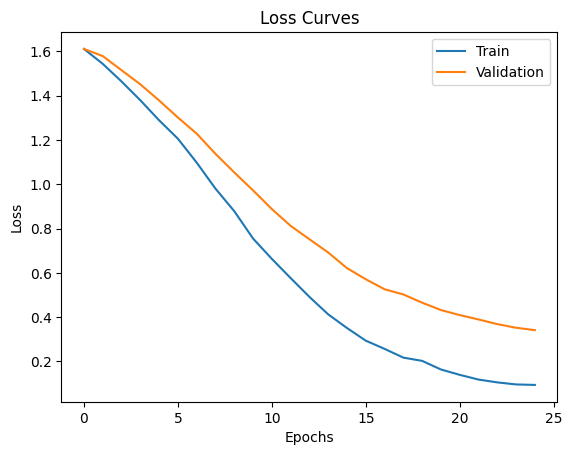

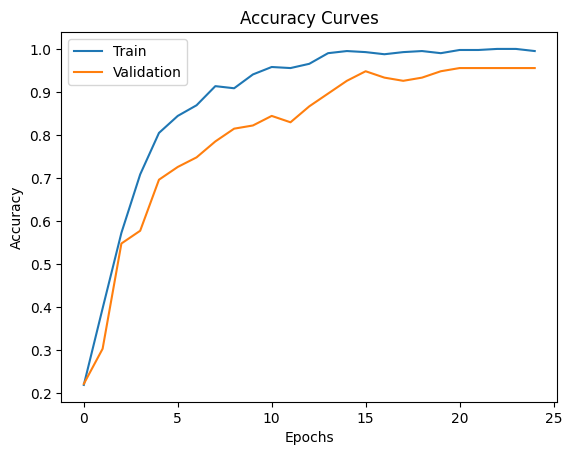

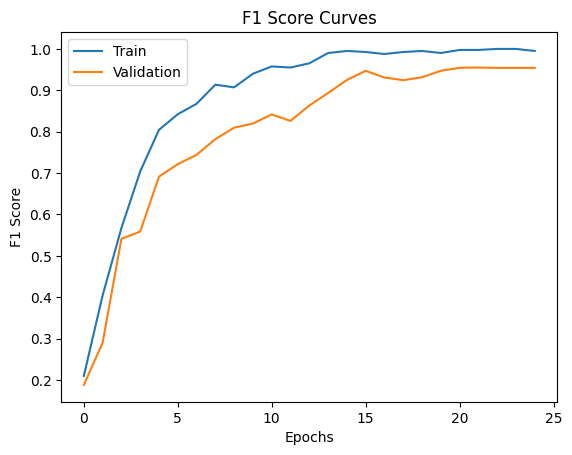

In [9]:
# EfficientNet

import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Horizontal", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []

def train_model(model, criterion, optimizer, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels



# Load a pretrained model(EfficientNet)
model = timm.create_model('tf_efficientnet_b5_ns', pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 5)  # Change the classifier layer to 5
model = model.to(device)


criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train and evaluate
model = train_model(model, criterion, optimizer, num_epochs=25)








# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [ ]:
# Use vertical data to train ResNet18, ViT and EfficientNet

This part is to compare the model performance on horizontal images and vertical images.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------
train Loss: 1.74915  Acc: 0.13580   F1_Score: 0.11273
val Loss: 1.76876  Acc: 0.14074   F1_Score: 0.10813

Epoch 1/24
----------
train Loss: 1.66609  Acc: 0.20988   F1_Score: 0.20267
val Loss: 1.73168  Acc: 0.19259   F1_Score: 0.11249

Epoch 2/24
----------
train Loss: 1.59805  Acc: 0.25926   F1_Score: 0.22858
val Loss: 1.67515  Acc: 0.22963   F1_Score: 0.15622

Epoch 3/24
----------
train Loss: 1.50190  Acc: 0.32099   F1_Score: 0.28018
val Loss: 1.57433  Acc: 0.26667   F1_Score: 0.22806

Epoch 4/24
----------
train Loss: 1.36586  Acc: 0.46420   F1_Score: 0.42803
val Loss: 1.46857  Acc: 0.34815   F1_Score: 0.31888

Epoch 5/24
----------
train Loss: 1.25801  Acc: 0.58025   F1_Score: 0.54342
val Loss: 1.37222  Acc: 0.43704   F1_Score: 0.40626

Epoch 6/24
----------
train Loss: 1.14799  Acc: 0.60494   F1_Score: 0.57450
val Loss: 1.29485  Acc: 0.51852   F1_Score: 0.48784

Epoch 7/24
----------
train Loss: 1.03517  Acc: 0.70123   F1_Score: 0.69604
val Loss: 1.22930  Ac

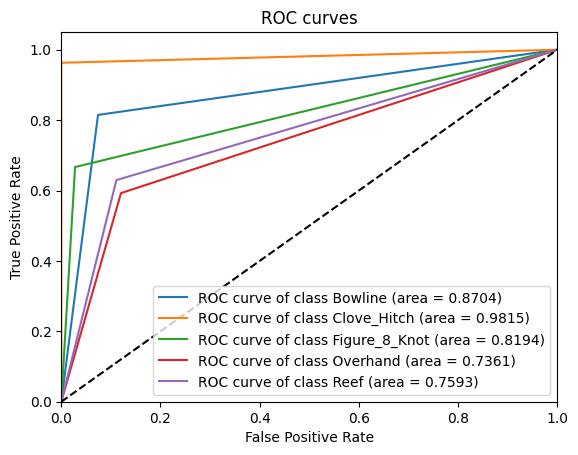

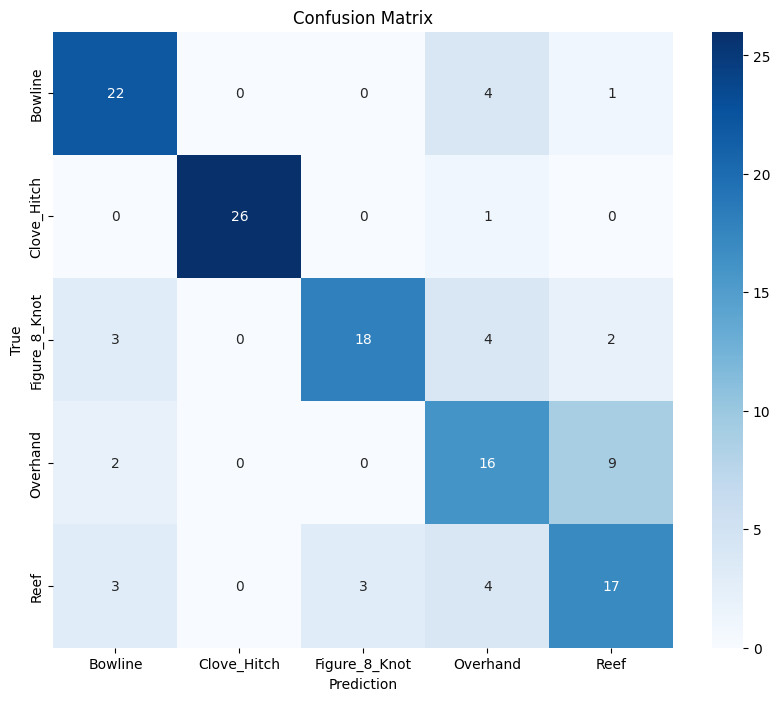

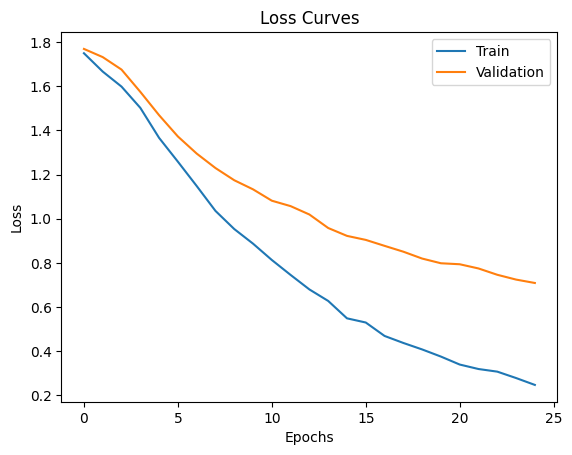

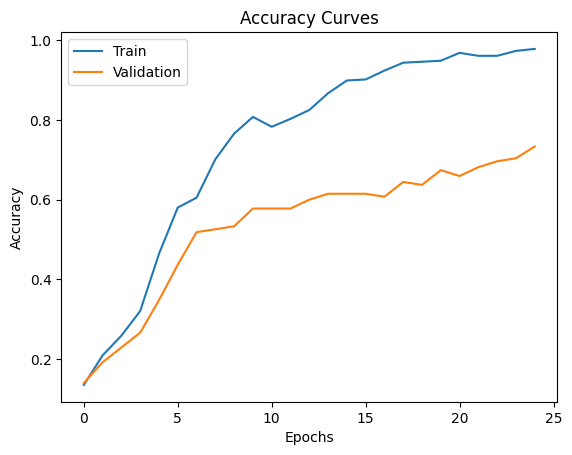

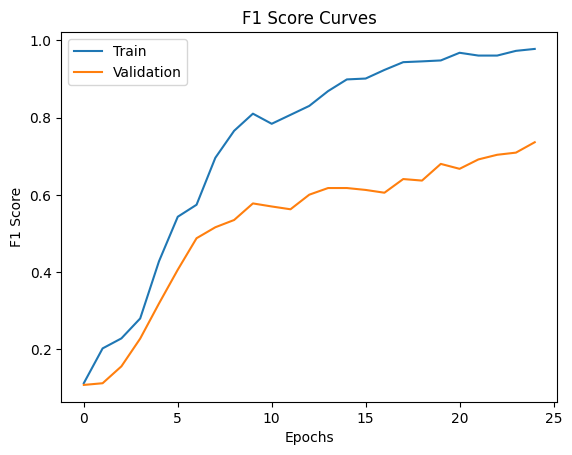

In [10]:
# ResNet18



import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
import optuna
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Vertical", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []


def train_model(model, criterion, optimizer, num_epochs=25, accumulation_steps=4):   # Gradient Accumulation to slove the insufficient GPU memory
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        if (i+1) % accumulation_steps == 0:  # Only update every 'accumulation_steps' steps
                          optimizer.step()
                          optimizer.zero_grad()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels


# Load a pretrained model(ResNet18)
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # Change the fc layer to 5
model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train and evaluate
model, best_preds, best_labels = train_model(model, criterion, optimizer, num_epochs=25)






# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1
Epoch 0/24
----------
train Loss: 2.40017  Acc: 0.20741   F1_Score: 0.20408
val Loss: 2.02430  Acc: 0.32593   F1_Score: 0.22123

Epoch 1/24
----------
train Loss: 2.29294  Acc: 0.24938   F1_Score: 0.22467
val Loss: 2.39803  Acc: 0.42222   F1_Score: 0.36244

Epoch 2/24
----------
train Loss: 2.26856  Acc: 0.42963   F1_Score: 0.37179
val Loss: 1.66006  Acc: 0.45185   F1_Score: 0.38419

Epoch 3/24
----------
train Loss: 1.15614  Acc: 0.61975   F1_Score: 0.57337
val Loss: 0.99051  Acc: 0.65185   F1_Score: 0.66004

Epoch 4/24
----------
train Loss: 0.73285  Acc: 0.73827   F1_Score: 0.74573
val Loss: 0.79056  Acc: 0.74074   F1_Score: 0.74126

Epoch 5/24
----------
train Loss: 0.40720  Acc: 0.85185   F1_Score: 0.85372
val Loss: 1.01062  Acc: 0.66667   F1_Score: 0.65052

Epoch 6/24
----------
train Loss: 0.36019  Acc: 0.87654   F1_Score: 0.87656
val Loss: 0.75426  Acc: 0.74074   F1_Score: 0.74002

Epoch 7/24
----------
train Loss: 0.33177  Acc: 0.88889   F1_

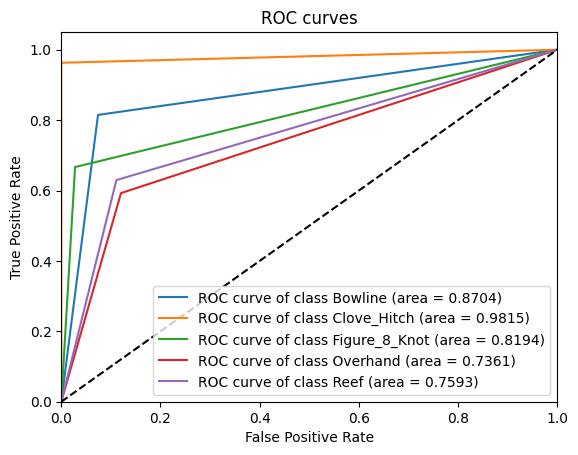

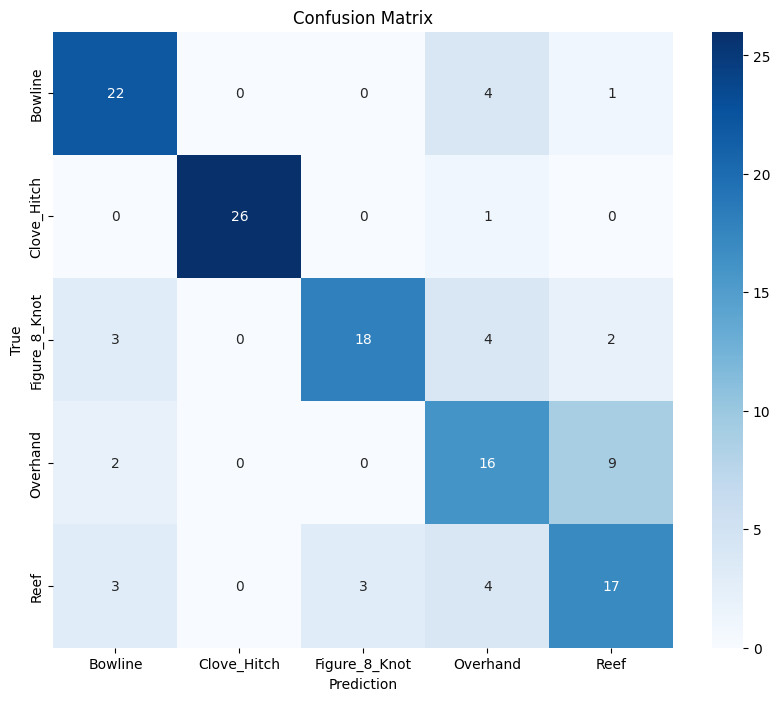

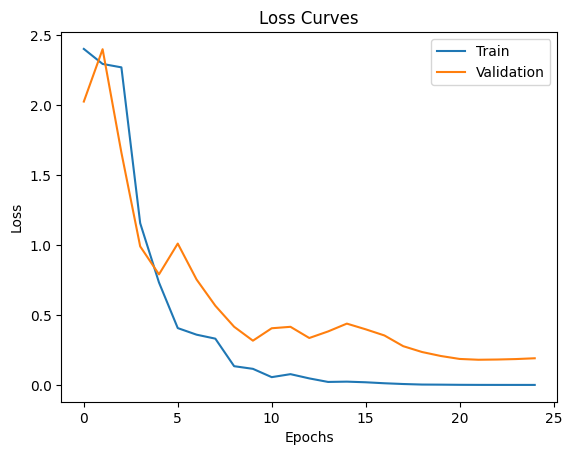

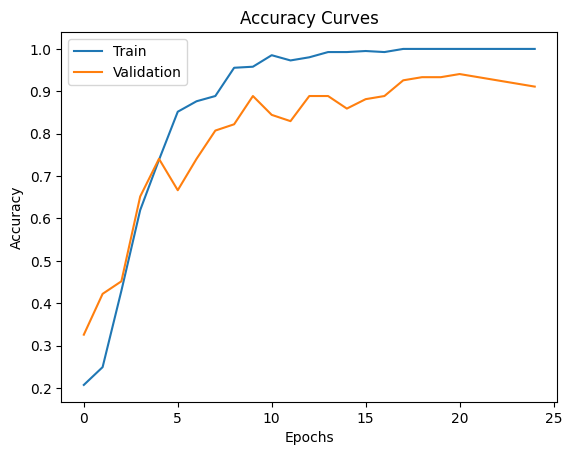

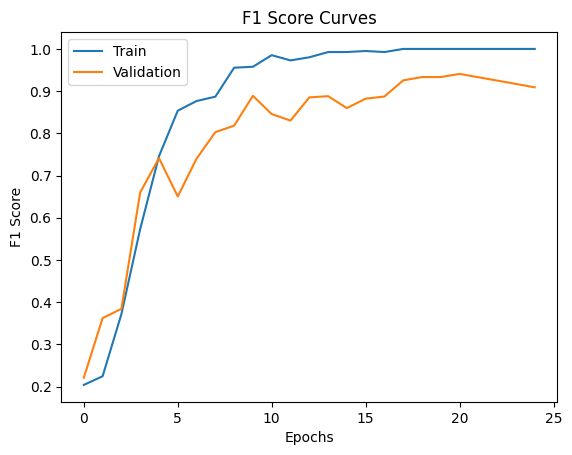

In [11]:
# Vision Transformers

import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
import optuna
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Vertical", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []


def train_model(model, criterion, optimizer, num_epochs=25, accumulation_steps=4):   # Gradient Accumulation to slove the insufficient GPU memory
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        if (i+1) % accumulation_steps == 0:  # Only update every 'accumulation_steps' steps
                          optimizer.step()
                          optimizer.zero_grad()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels

# Load a pretrained model(ViT)
model = timm.create_model('vit_large_patch16_224', pretrained=True)
num_ftrs = model.head.in_features
model.head = nn.Linear(num_ftrs, 5)  # Change the head layer to 5
model = model.to(device)


criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train and evaluate
model = train_model(model, criterion, optimizer, num_epochs=25)







# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1


/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name tf_efficientnet_b5_ns to current tf_efficientnet_b5.ns_jft_in1k.
  model = create_fn(


Epoch 0/24
----------
train Loss: 1.59745  Acc: 0.25432   F1_Score: 0.24000
val Loss: 1.58957  Acc: 0.24444   F1_Score: 0.22089

Epoch 1/24
----------
train Loss: 1.53744  Acc: 0.39753   F1_Score: 0.38890
val Loss: 1.55355  Acc: 0.35556   F1_Score: 0.34258

Epoch 2/24
----------
train Loss: 1.46385  Acc: 0.61481   F1_Score: 0.60348
val Loss: 1.51216  Acc: 0.44444   F1_Score: 0.40881

Epoch 3/24
----------
train Loss: 1.40040  Acc: 0.65185   F1_Score: 0.63873
val Loss: 1.47228  Acc: 0.51111   F1_Score: 0.46978

Epoch 4/24
----------
train Loss: 1.33037  Acc: 0.73086   F1_Score: 0.72414
val Loss: 1.42477  Acc: 0.51852   F1_Score: 0.49711

Epoch 5/24
----------
train Loss: 1.24378  Acc: 0.79506   F1_Score: 0.79187
val Loss: 1.36413  Acc: 0.58519   F1_Score: 0.57318

Epoch 6/24
----------
train Loss: 1.15800  Acc: 0.82222   F1_Score: 0.82041
val Loss: 1.30772  Acc: 0.62222   F1_Score: 0.61189

Epoch 7/24
----------
train Loss: 1.05302  Acc: 0.85185   F1_Score: 0.85202
val Loss: 1.25075  Ac

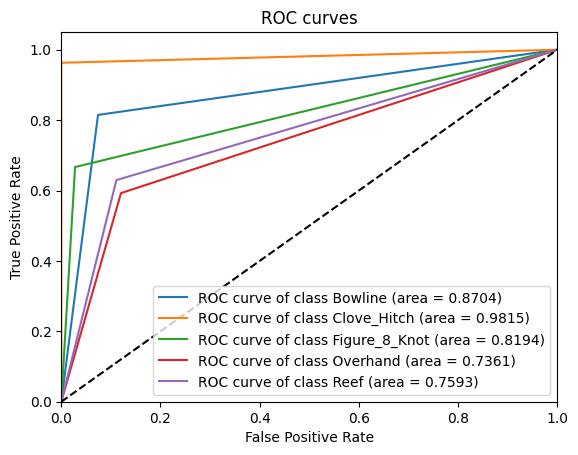

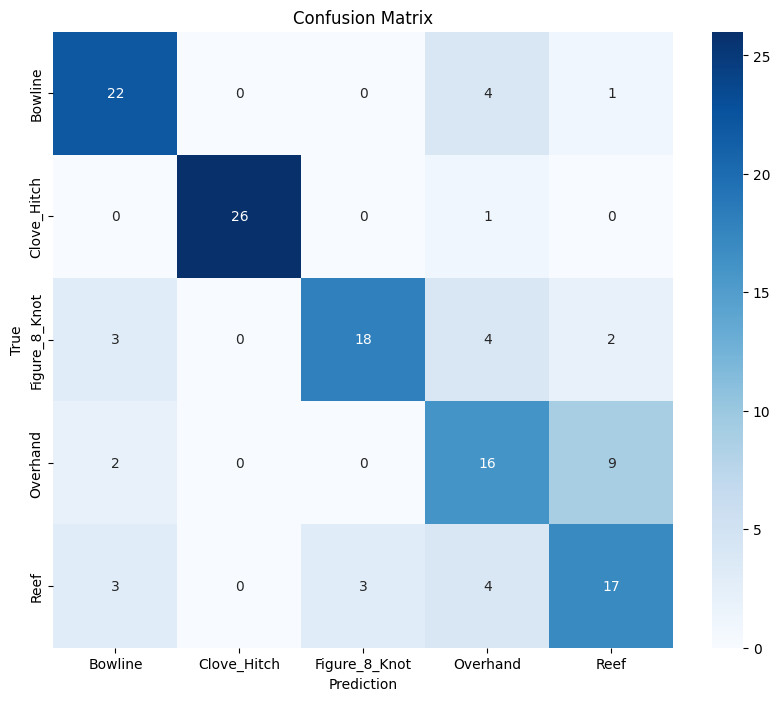

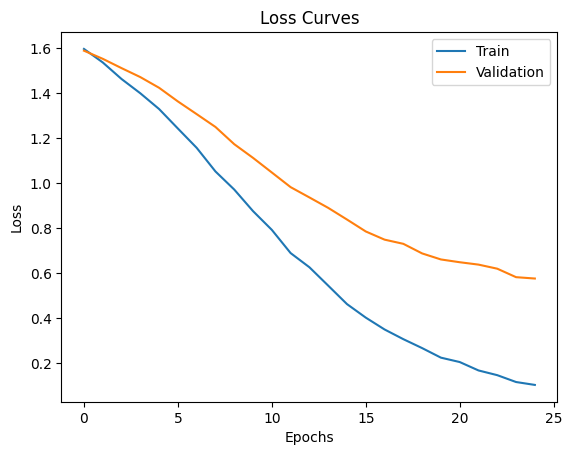

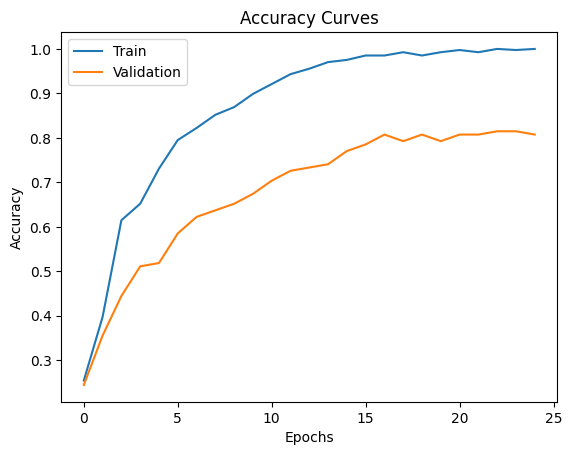

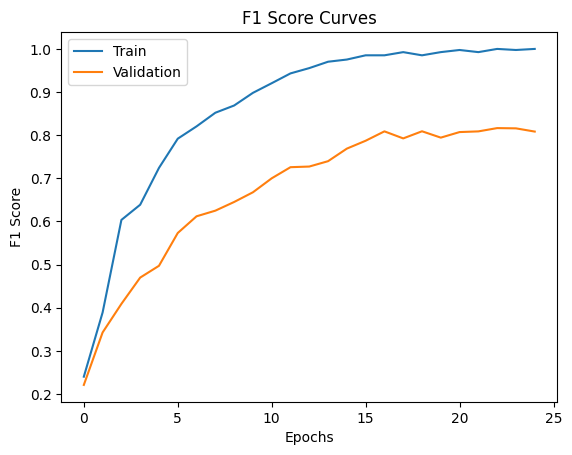

In [12]:
# EfficientNet

import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Vertical", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []

def train_model(model, criterion, optimizer, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels



# Load a pretrained model(EfficientNet)
model = timm.create_model('tf_efficientnet_b5_ns', pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 5)  # Change the classifier layer to 5
model = model.to(device)


criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train and evaluate
model = train_model(model, criterion, optimizer, num_epochs=25)








# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()